In [1]:
# Imports etc.
import torch
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load data
sample = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_0/sample.pt')
kpts = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_0/key_points.pt')
print(sample.shape)
print(kpts.shape)

torch.Size([1, 30, 3, 128, 128])
torch.Size([1, 30, 48, 3])


In [3]:
from src.utils.kpt_utils import kpts_2_img_coordinates, get_active_kpts
_kpts = torch.clone(kpts)
_kpts = get_active_kpts(_kpts, 0.3)
_kpts[..., :2] *= -1
img_coordinates = kpts_2_img_coordinates(_kpts, sample.shape[-2:])

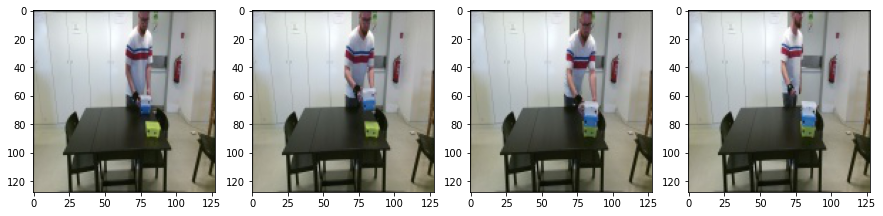

In [4]:
nt = 4
dt = 5
fig, ax = plt.subplots(1, nt, figsize=(15, 5))
for i, t in enumerate(range(0, nt*dt, dt)):
    ax[i].imshow(sample[0, t].permute(1, 2, 0))
    #for k in range(img_coordinates.shape[2]):
    #    ax[i].scatter(img_coordinates[0, t, k, 0], img_coordinates[0, t, k, 1])

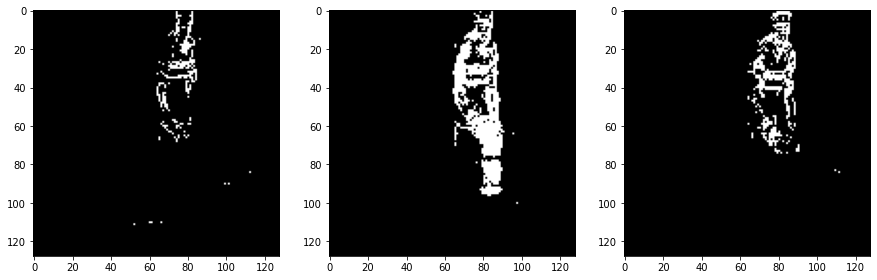

In [5]:
fig, ax = plt.subplots(1, nt-1, figsize=(15, 5))
for i, t in enumerate(range(0, (nt-1)*dt, dt)):
    d = (sample[0, t] - sample[0, t+1]).clip(-1.0, 1.0)
    d_mask = torch.where((torch.abs(torch.norm(d, dim=0, p=2)) > 0.075), 1.0, 0.0)
    ax[i].imshow(d_mask, cmap='gray')

In [6]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

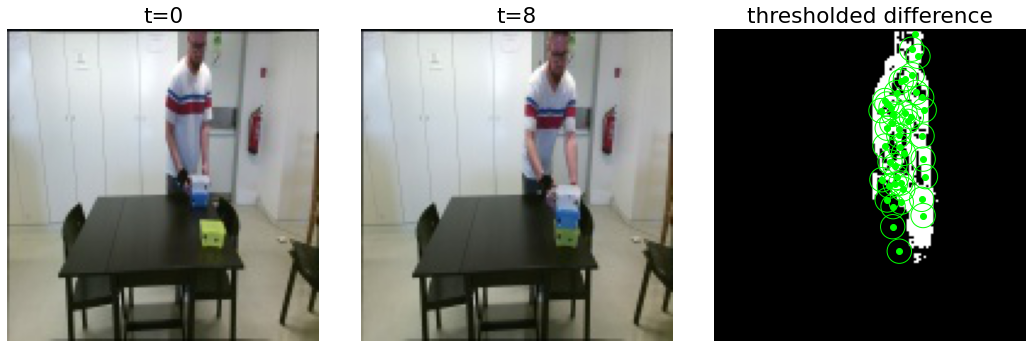

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
d = (sample[0, 0] - sample[0, 8]).clip(-1.0, 1.0)
d_mask = torch.where((torch.abs(torch.norm(d, dim=0, p=2)) > 0.15), 1.0, 0.0)
ax[0].imshow(sample[0, 0].permute(1, 2, 0))
ax[0].set_title('t=0')
ax[0].axis('off')
ax[1].imshow(sample[0, 8].permute(1, 2, 0))
ax[1].set_title('t=8')
ax[1].axis('off')
ax[2].imshow(d_mask, cmap='gray')
ax[2].set_title('thresholded difference')
ax[2].axis('off')
for k in range(img_coordinates.shape[2]):
    ax[2].scatter(img_coordinates[0, 8, k, 0], img_coordinates[0, 8, k, 1], color='lime')
    if (img_coordinates[0, 8, k, 0] - 5 > 0) and (img_coordinates[0, 8, k, 1] - 5 > 0):
        circle = plt.Circle((img_coordinates[0, 8, k, 0], img_coordinates[0, 8, k, 1]), 5, color='lime', fill=False)
        ax[2].add_patch(circle)
plt.tight_layout()
plt.show()
fig.savefig('/home/yannik/precision_simitate_example_1.svg', bbox_inches='tight')

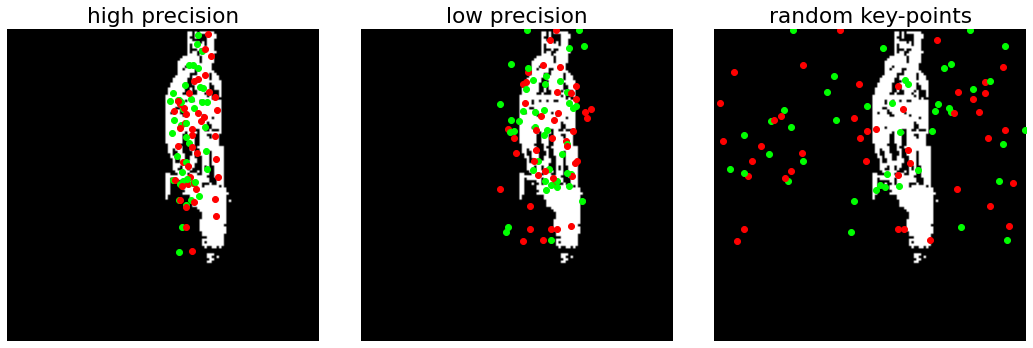

In [14]:
_img_coordinates = torch.clone(img_coordinates)
_img_coordinates[..., :2] += ((torch.rand_like(_img_coordinates[..., :2]) - 0.5) * 2 * sample.shape[-1]/10)
_img_coordinates[..., :2].clip_(0, sample.shape[-1])

rand_img_coordinates = torch.rand_like(_img_coordinates)
rand_img_coordinates[..., :2] *= sample.shape[-1]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(d_mask, cmap='gray')
ax[0].axis('off')
ax[0].set_title('high precision')
ax[1].imshow(d_mask, cmap='gray')
ax[1].axis('off')
ax[1].set_title('low precision')
ax[2].imshow(d_mask, cmap='gray')
ax[2].axis('off')
ax[2].set_title('random key-points')
for k in range(img_coordinates.shape[2]):
    ax[0].scatter(img_coordinates[0, 0, k, 0], img_coordinates[0, 0, k, 1], color='lime')
    ax[0].scatter(img_coordinates[0, 8, k, 0], img_coordinates[0, 8, k, 1], color='red')
    ax[1].scatter(_img_coordinates[0, 0, k, 0], _img_coordinates[0, 0, k, 1], color='lime')
    ax[1].scatter(_img_coordinates[0, 8, k, 0], _img_coordinates[0, 8, k, 1], color='red')
    ax[2].scatter(rand_img_coordinates[0, 0, k, 0], _img_coordinates[0, 0, k, 1], color='lime')
    ax[2].scatter(rand_img_coordinates[0, 8, k, 0], _img_coordinates[0, 8, k, 1], color='red')

plt.tight_layout()
plt.show()
fig.savefig('/home/yannik/precision_simitate_example_2.svg', bbox_inches='tight')